In [1]:
# import package
# installed via pip
from emtracks.particle import trajectory_solver # main solver object
from emtracks.conversions import one_gev_c2_to_kg # conversion for q factor (transverse momentum estimate)
from emtracks.tools import *#InitConds # initial conditions namedtuple
from emtracks.mapinterp import get_df_interp_func  # factory function for creating Mu2e DS interpolation function
from emtracks.Bdist import get_B_df_distorted
import matplotlib.animation as animation
import numpy as np
from scipy.constants import c, elementary_charge
import pandas as pd
import pickle as pkl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [24,16] # bigger figures
from matplotlib import style
style.use('fivethirtyeight')
import os

testdir = "/home/darren/Desktop/plots/"
datadir = "/home/shared_data/"
plotdir = datadir+"plots/randomphi/"
mapdir = datadir+"Bmaps/"
date = "/6-20/"
newdir = datadir+'50_Gauss_z_3-14'

ERROR! Please set $EMTRACKS_DDIR and $EMTRACKS_PDIR. Setting defaults (current directory)


In [2]:
def readpickle():
    files = sorted(os.listdir(newdir))
    files[0], files[1], files[2], files[3] = files[2], files[3], files[0], files[1]

    phinom = []
    phidis = []
    nomdata = []
    disdata = []

    nom = {}
    dis = {}

    for file in files:
        if file.endswith('nom.pkl'):
            e_solvernom = trajectory_solver.from_pickle(newdir+'/'+file)
            phinom.append(e_solvernom.init_conds.phi0)
            nomdata.append(e_solvernom.dataframe)
            #nom.update({str(e_solvernom.init_conds.phi0), e_solvernom.dataframe})
            
        if file.endswith('dis.pkl'):
            e_solverdis = trajectory_solver.from_pickle(newdir+'/'+file)
            phidis.append(e_solverdis.init_conds.phi0)
            disdata.append(e_solverdis.dataframe)
            #dis.update({str(e_solverdis.init_conds.phi0), e_solverdis.dataframe})
    if phinom == phidis:
        for i in range(0, len(phinom), 1):
            nom.update({phinom[i]:nomdata[i]})
            dis.update({phidis[i]:disdata[i]})
            
    if phinom == phidis:
        return nom, dis, phinom, len(phinom)

In [3]:
x, y, z, t = readpickle()


In [4]:
def find_track_at_z(df, z): 
    delta = (df.z.max() - df.z.min()) / len(df.z)
    #delta = 10/4001   #approximate z range divided by number of points
    mask = (df['z'] < z + delta) & (df['z'] > z - delta)
    
    while (len(df.z[mask]) > 2):
        delta = delta / 2
        mask = (df.z < z + delta) & (df.z > z - delta)
    while (len(df.z[mask]) == 0):
        delta = delta*2
        mask = (df.z < z + delta) & (df.z > z - delta)
    df2 = df.loc[mask]
    df2 = df2.apply(pd.to_numeric)
    return ([df2.iloc[0]['x'], df2.iloc[0]['y'], df2.iloc[0]['z'], df2.iloc[0]['t'], df2.iloc[0]['r']])

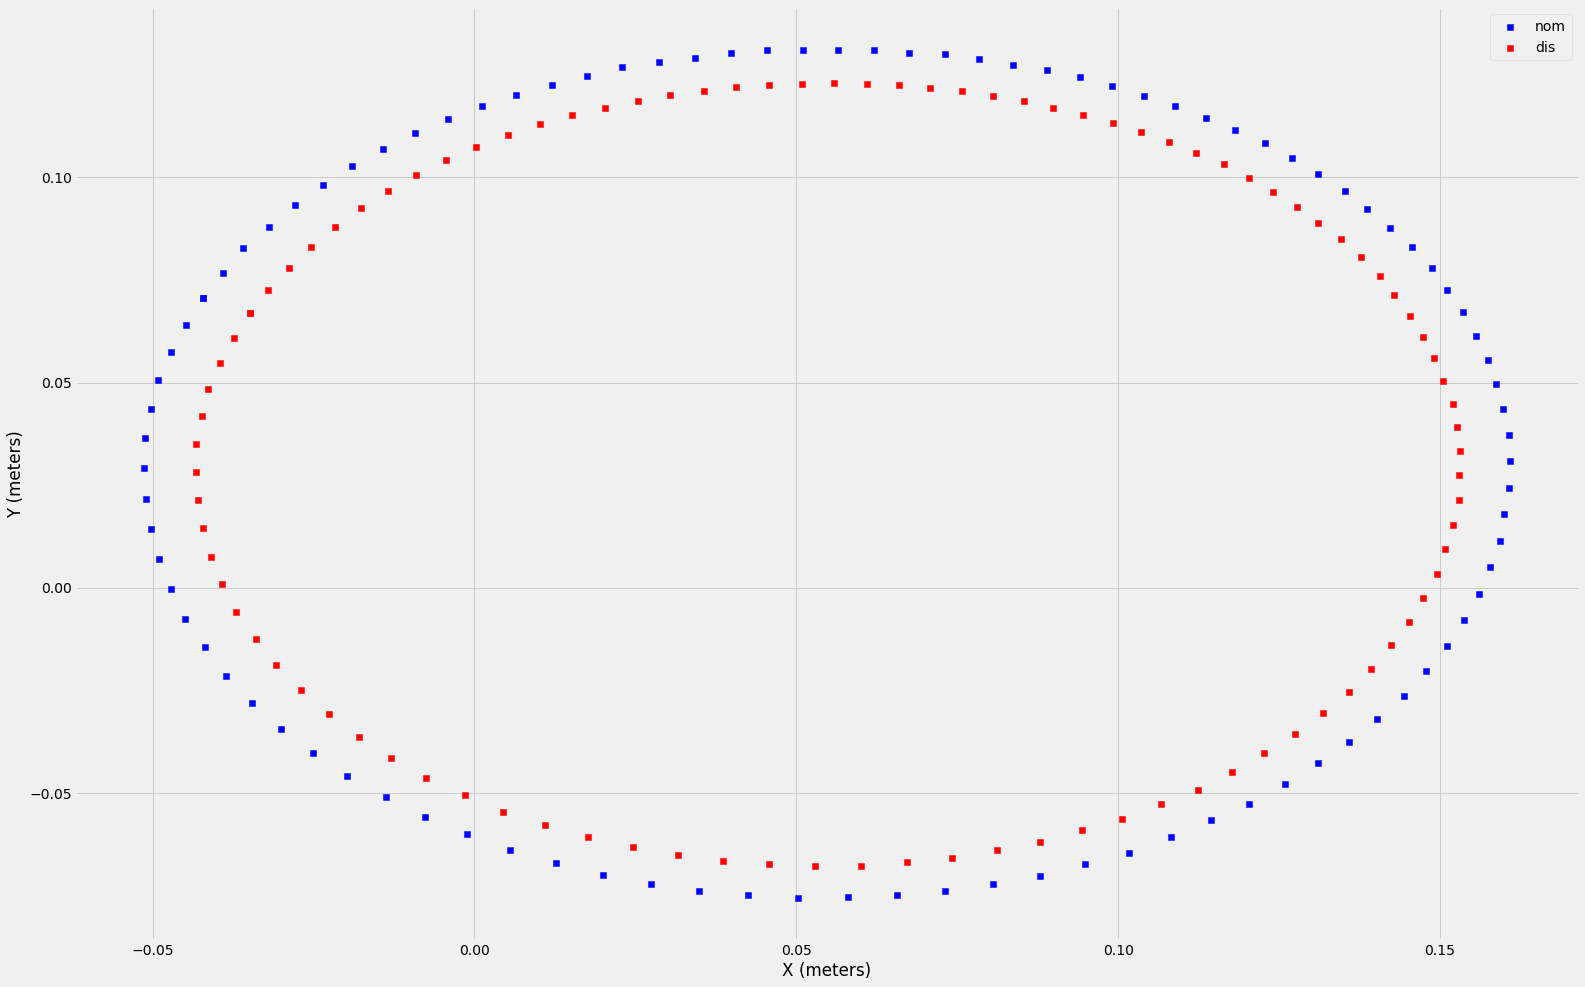

In [14]:
z = 8

x1 = []
y1 = []
z1 = []
t1 = []
r1 = []
x2 = []
y2 = []
z2 = []
t2 = []
r2 = []

for i in x:
    p = find_track_at_z(x[i], z)
    x1.append(p[0])
    y1.append(p[1])
    z1.append(p[2])
    
    o = find_track_at_z(y[i], z)
    x2.append(o[0])
    y2.append(o[1])
    z2.append(o[2])

fig1 = plt.figure()
plt.scatter(x1, y1, c='b', marker='s', label='nom')
plt.scatter(x2, y2, c='r', marker='s', label='dis')
plt.legend(loc='upper right')
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
plt.show()
    
    